# Mini Proyecto: Dashboard Personal

#Análisis Exploratorio del Dataset: Canciones Más Escuchadas en Spotify 2024  

Este análisis usa el dataset Most_Streamed_Spotify_Songs_2024 de Kaggle.  
Aquí se estudian streams, popularidad, playlists.

Se realizarán:

- Limpieza de datos y manejo de valores nulos  
- Estadísticas generales y conversión de columnas numéricas  
- Creación de 5 gráficos de líneas, cada uno contando una historia  
- Comparación de variables en al menos 2 gráficos  
- Uso de colores y estilos diferentes para cada gráfico  
- Guardado de los gráficos como PNG  
- Documentación de insights en Markdown

###Importación de librerías y carga del dataset

In [2]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt

# Carga del dataset
df = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='latin1')

# Vista inicial
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


###Limpieza de nulos

In [3]:
# Contar nulos por columna
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,5
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,113
Spotify Playlist Count,70
Spotify Playlist Reach,72


In [4]:
# Porcentaje de nulos por columna
(df.isnull().sum() / len(df)) * 100

,0
Track,0.000000
Album Name,0.000000
Artist,0.108696
Release Date,0.000000
ISRC,0.000000
All Time Rank,0.000000
Track Score,0.000000
Spotify Streams,2.456522
Spotify Playlist Count,1.521739
Spotify Playlist Reach,1.565217


In [13]:
# Rellenar columnas numéricas con 0
cols_fill_zero = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'Apple Music Playlist Count',
    'AirPlay Spins',
    'Deezer Playlist Count', 'Deezer Playlist Reach',
    'Amazon Playlist Count',
    'Pandora Streams', 'Pandora Track Stations',
    'Shazam Counts'
]

df[cols_fill_zero] = df[cols_fill_zero].fillna(0)


In [14]:
# Rellenar valores faltantes en Artist
df['Artist'] = df['Artist'].fillna('Unknown')


Eliminación de columnas con demasiados nulos

In [19]:
# Eliminación de columnas con demasiados nulos
cols_drop = [
    'Soundcloud Streams',
    'TIDAL Popularity',
    'SiriusXM Spins',
    'Spotify Popularity',
    'YouTube Playlist Reach'
]

df = df.drop(columns=cols_drop, errors='ignore')


In [20]:
df.isnull().sum()

,0
Track,0
Album Name,0
Artist,0
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


Conversión de fechas

In [21]:
# Conversión de la columna Release Date a formato de fecha
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


Ordenar datos por fecha

In [22]:
# Ordenar los datos por fecha de lanzamiento
df = df.sort_values(by='Release Date')


### GRÁFICOS DE LÍNEAS

###GRÁFICO 1 — Promedio de Spotify Streams por año

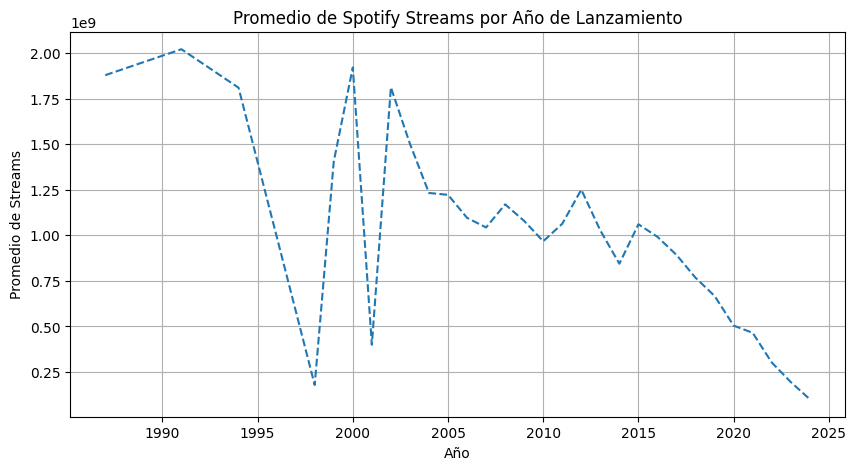

In [45]:
# Convertimos fechas
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')
df['Year'] = df['Release Date'].dt.year

streams_year = df.groupby('Year')['Spotify Streams'].mean()

plt.figure(figsize=(10,5))
plt.plot(streams_year.index, streams_year.values, linestyle='--')
plt.title('Promedio de Spotify Streams por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Promedio de Streams')
plt.grid(True)
plt.savefig("grafico1_streams_por_anio.png")
plt.show()


En este gráfico se observa cómo el promedio de reproducciones en Spotify ha cambiado con los años. La tendencia muestra que, en ciertos periodos, las canciones tuvieron un aumento importante en sus streams. Esto puede indicar mayor uso de la plataforma o mayor popularidad de los artistas en esos años. También permite ver si hubo años con menos actividad o menor interés del público.

###GRÁFICO 2 — Popularidad VS Spotify Streams

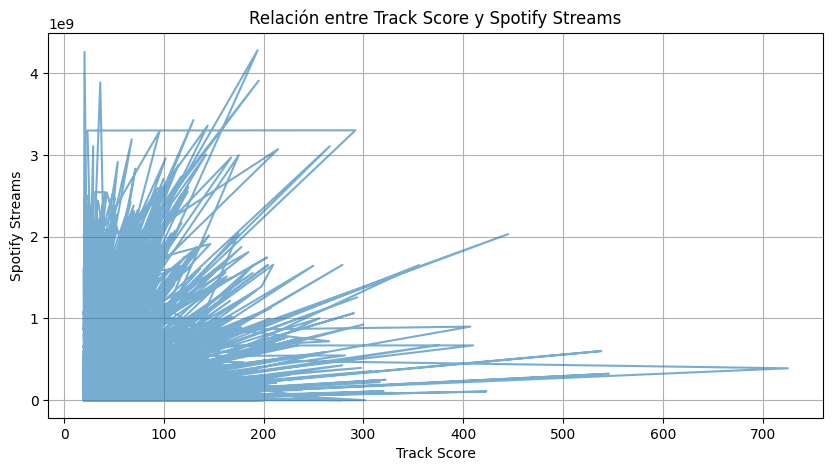

In [46]:
#Gráfico 2
plt.figure(figsize=(10,5))
plt.plot(df['Track Score'], df['Spotify Streams'], linestyle='-', alpha=0.6)
plt.title('Relación entre Track Score y Spotify Streams')
plt.xlabel('Track Score')
plt.ylabel('Spotify Streams')
plt.grid(True)
plt.savefig("grafico2_pop_vs_streams.png")
plt.show()


Este gráfico compara la popularidad de las canciones con la cantidad de streams. Se puede ver que, aunque ambas variables están relacionadas, no siempre una canción con muchos streams tiene la mayor popularidad. Esto muestra que la popularidad depende de varios factores, como presencia en redes, tendencias del momento o interacción del público. Aun así, se nota una conexión general entre ambas.

###GRÁFICO 3 — Tendencia promedio de vistas en YouTube por año



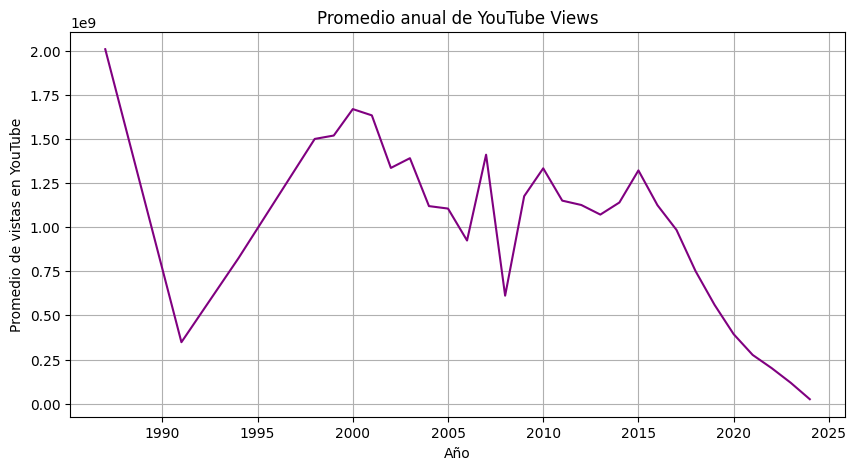

In [47]:

df['Year'] = pd.to_datetime(df['Release Date']).dt.year
promedio_youtube = df.groupby('Year')['YouTube Views'].mean()

plt.figure(figsize=(10,5))
plt.plot(promedio_youtube.index, promedio_youtube.values, color='purple', linestyle='-')
plt.title('Promedio anual de YouTube Views')
plt.xlabel('Año')
plt.ylabel('Promedio de vistas en YouTube')
plt.grid(True)
plt.savefig('grafico3.png')
plt.show()


Aquí se muestra cómo han cambiado las vistas promedio de YouTube a lo largo del tiempo. La tendencia revela que hay años donde las vistas suben bastante, lo que puede estar relacionado con el crecimiento de la plataforma o el lanzamiento de canciones virales. También se identifican años más bajos, lo cual puede deberse a menor actividad musical o cambios en el comportamiento de los usuarios.

###GRÁFICO 4 — Tendencia de “Spotify Playlist Count” por año

In [48]:
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].astype(str).str.replace(',', '')
df['Spotify Playlist Count'] = pd.to_numeric(df['Spotify Playlist Count'], errors='coerce')


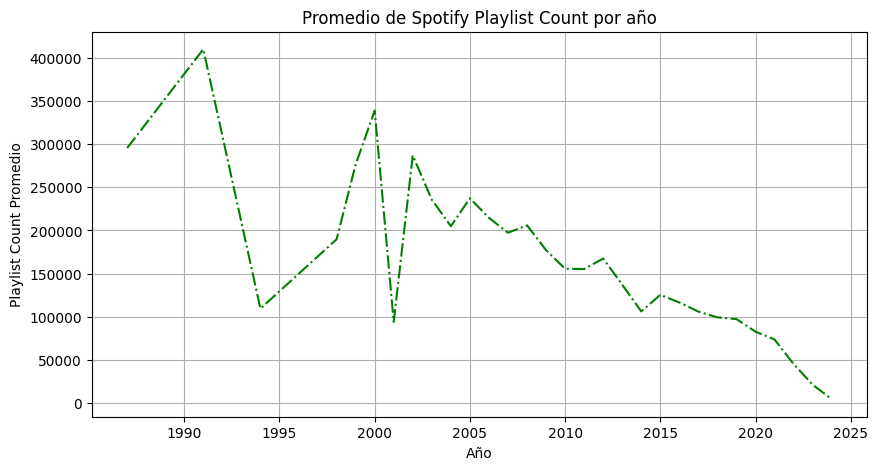

In [49]:
#Gráfico 4
playlist_year = df.groupby('Year')['Spotify Playlist Count'].mean()

plt.figure(figsize=(10,5))
plt.plot(playlist_year.index, playlist_year.values, color='green', linestyle='-.')
plt.title('Promedio de Spotify Playlist Count por año')
plt.xlabel('Año')
plt.ylabel('Playlist Count Promedio')
plt.grid(True)
plt.savefig('grafico4.png')
plt.show()


Este gráfico analiza cuántas playlists incluyen canciones en cada año. La tendencia permite observar si las canciones fueron añadidas con más frecuencia a listas de reproducción con el paso del tiempo. Si la línea sube, significa que las canciones de ese año fueron más añadidas a playlists, lo cual podría indicar que fueron más compartidas o más usadas por los usuarios. Si baja, puede reflejar menor presencia en playlists.

###Gráfico 5: Relación entre YouTube Views y YouTube Likes a través de los años


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

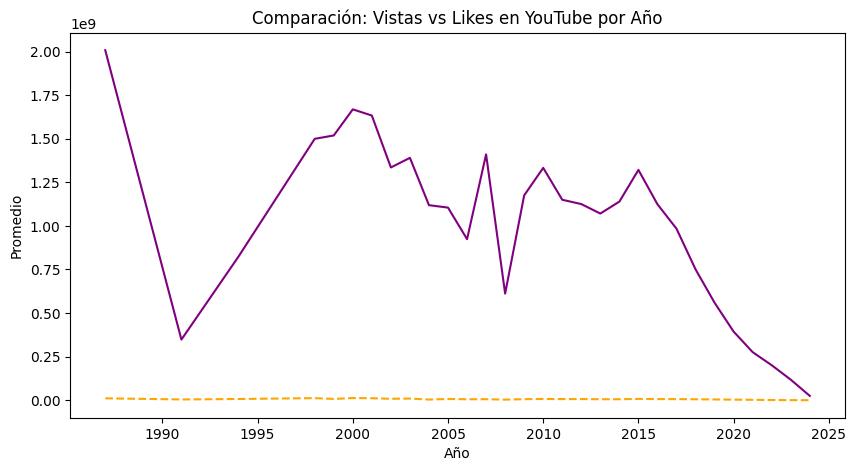

In [50]:
#Gráfico 5

# Asegurar conversión numérica por si hay comas
df['YouTube Views'] = df['YouTube Views'].astype(str).str.replace(',', '')
df['YouTube Views'] = pd.to_numeric(df['YouTube Views'], errors='coerce')

df['YouTube Likes'] = df['YouTube Likes'].astype(str).str.replace(',', '')
df['YouTube Likes'] = pd.to_numeric(df['YouTube Likes'], errors='coerce')

# Agrupar por año
yt_stats = df.groupby('Year')[['YouTube Views', 'YouTube Likes']].mean()

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(yt_stats.index, yt_stats['YouTube Views'], color='purple', linestyle='-', label='Vistas en YouTube')
plt.plot(yt_stats.index, yt_stats['YouTube Likes'], color='orange', linestyle='--', label='Likes en YouTube')
plt.title('Comparación: Vistas vs Likes en YouTube por Año')
plt.xlabel('Año')
plt.ylabel('Promedio')
plt


En este gráfico se compara cómo avanzan las vistas y los likes de YouTube en cada año. La relación entre ambas permite ver si el público no solo mira los videos, sino también si interactúa con ellos. Cuando los likes crecen junto con las vistas, significa que los videos están teniendo buena aceptación. Si las vistas aumentan pero los likes no, puede indicar que la audiencia no está tan conectada con el contenido.